In [1]:
using Random, Plots
import Statistics

# Problem 2
Problem Statement
>>
Consider a random variable $Z_t$ that represents the vertical height of a micro-droplet.

### Discussion of modelling approach
Inherintly I want to model the effect of collision forces on particles, to get changes in acceleration.
Then acceleration can be integrated to give velocity, which can be integrated to give position.

I'm going to model the position $Z_t$ as the integral of a stochastic process $Y_t$, describing the velocity of the micro_droplet.
$Y_t$ in turn is the integral over the acceleration of the micro_droplet, represented as a stochastic process $X_t = g + \epsilon_t$.
The constant $g$ represents the appropriately scaled acceleration due to gravity.
By choosing $\epsilon_t \sim N(0,\eta^2)$, we end up getting a nonzero $X_t$, which leads to the downward biased velocity.
The final integration will give the positions we care about.



## Part A
To get an approximation of the occupational time, $\tau$, I'm going to simulate the path of a large number 
of particles from the top of the bounding box, and measure how many steps it takes for them to leave the box.

There are going to be two leaving conditions:
 - When a particle leaves the top of the box
 - When the particle leaves the bottom of the box.

### Thoughts on computational approach
So, I'm going compute the occupational time by simulating each particle in a while loop individually.
Thus I'm not going to be 


## Part B

### Thoughts on computational approach


## Simplifying assumptions
I am going to rescale my coordinates in length and time, such that $g=1$ in the time period that I care about.

In [2]:
#Constants
GRAVITY = -0.50
η = 2e-1

0.2

In [3]:
#Create a struct to capture the type of exit, with a couple of helpful methods
struct ExitType
    time::Int
    exited_top::Bool
end

measured_time(exit_type::ExitType) = exit_type.time
exited_top_boundary(exit_type::ExitType) = exit_type.exited_top
exited_bottom_boundary(exit_type::ExitType) = !exit_type.exited_top

exited_bottom_boundary (generic function with 1 method)

In [4]:
test = ExitType(3,false)
measured_time(test),exited_top_boundary(test),exited_bottom_boundary(test)

(3, false, true)

In [5]:
function tick(position::Float64,velocity::Float64)
    #this takes a particle, defined by position and velocity, and adjusts each
    acceleration = GRAVITY + η*randn()
    
    velocity = velocity + acceleration
    position = position + velocity
    
    return position,velocity
end

tick (generic function with 1 method)

In [6]:
function time_in_box(lower_bound::Float64, initial_velocity::Float64)
    #this function takes a lower bound on the box and initial velocity
    #then calculates the number of steps until it leaves the box.
    position = 0.0
    velocity = initial_velocity
    counter = 0
    
    while true
        #update counter
        counter += 1
        
        #update position
        position, velocity = tick(position,velocity)
        
        # Exit conditions
        if position < lower_bound
            #if you float below the bottom boundary
            return ExitType(counter,false)
        elseif position > 0
            #if you float above the top boundary
            return ExitType(counter,true) 
        else
            continue
        end
    end
end

time_in_box (generic function with 1 method)

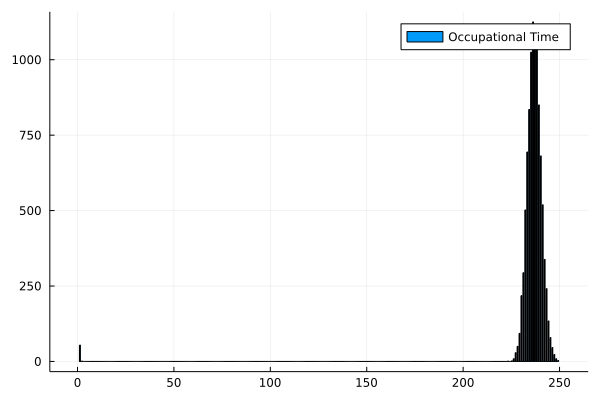

In [7]:
#Exit durations, all particles, histogram
NN=10_000

durations = [time_in_box(-14000.0,0.0).time for i=1:NN];
histogram(durations, label="Occupational Time")

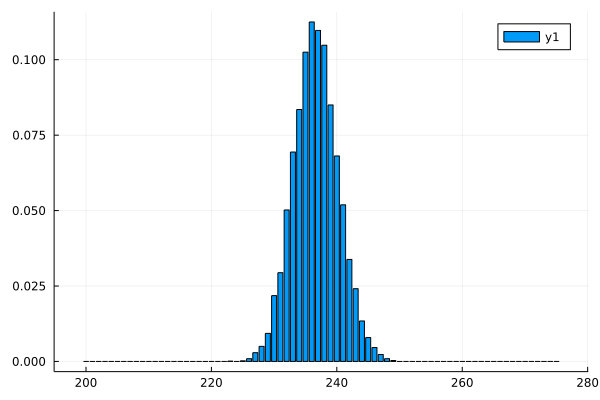

In [8]:
#exit durations, all particles, percentage
dats = [sum( [i == m for i = durations])/NN for m=200:275];
bar(200:275,dats)

In [9]:
println("Mean: ",Statistics.mean(durations))
println("Var:  ",Statistics.var(durations))

Mean: 235.3496
Var:  316.3198118211821


# Part B

In [10]:

mutable struct PointPath
    position::Vector{Float64}
    velocity::Vector{Float64}
    counter::Int
    PointPath(p,v) = new(p,v,0)
end

abstract type Exited end
struct Top <: Exited 
    point::PointPath
end
struct Bottom <: Exited 
    point::PointPath
end
struct NotYet <: Exited end

struct Bounds
    upper::Float64
    lower::Float64
end


In [11]:
function tick(pp::PointPath, boundaries::Bounds)
    pp.counter +=1
    
    #update point path
    acceleration = GRAVITY + η*randn()
    
    velocity = pp.velocity[pp.counter] + acceleration
    position = pp.position[pp.counter] + velocity
    
    if position < boundaries.lower
        return Bottom(pp)
    elseif position > boundaries.upper
        return Top(pp)
    else
        append!(pp.position,position)
        append!(pp.velocity,velocity)
        return NotYet()
    end
end

tick (generic function with 2 methods)

In [15]:
function generate_walk(b, p = PointPath([0.0],[0.0]))
    
    while true
        t = tick(p,b)
        if t != NotYet()
        #print("Text")
            return t
        end
    end
end


generate_walk (generic function with 2 methods)

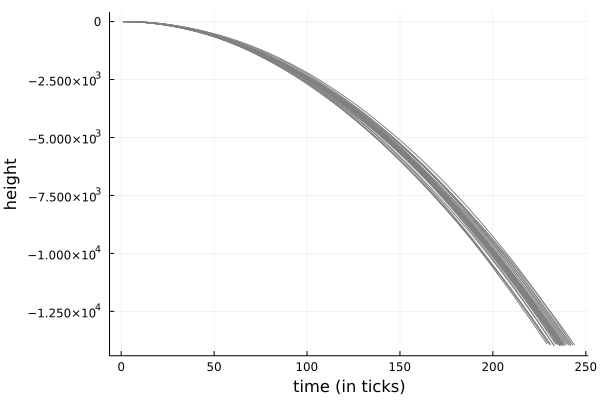

In [35]:
#Check for a box of 14k increments
b = Bounds(0,-14000)

plot([generate_walk(b).point.position for i=1:30]
    ,label=false
    ,color=:gray
    ,xaxis="time (in ticks)"
    ,yaxis="height"
)

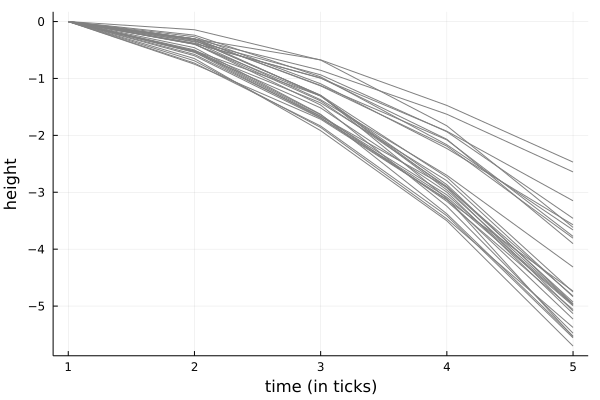

In [36]:
plot([generate_walk(b).point.position[1:5] for i=1:30]
    ,label=false
    ,color=:gray
    ,xaxis="time (in ticks)"
    ,yaxis="height"
)